**Task 3: Recommendation**
Hello Bob!
Breakfast was great! I’ve really enjoyed all those things you've told us about Data Science! I think you will be of
great help around here.
As I was telling you, we have budget for an additional campaign to be launched at the end of the month. The
idea is to be able to send our customers the product that interests them the most (and also the one that helps us
earn more, of course!). Keep in mind that our revenue is approximately of €10 for each account sold, €40 for
savings and investment products (plans, funds, etc.) and €60 for financing products (loans and cards).
In terms of budget, we are going to send about 10,000 emails. It would be great to be able to know with your
“ball of the future” what the response rate is going to be before sending it! (expected ROIs are of interest).
Maybe I'm already asking too much... hehe
We’ll prepare a cool presentation of everything to show it to Carol!!
I‘ve sent an email to Dan telling him that I have asked you for help, and to Frank to start setting everything up!
Erin

**Problem**: Predict the response rate of the campaign (expected ROI) for 10,000 target customers by considering €10 for each account sold, €40 for
savings and investment products (plans, funds, etc.) and €60 for financing products (loans and cards). The recommendation is based on products that interest customers most and also items that makes the most ROI:

**Approach:**
As the recommendation system is based on what interests users and also what products have more ROI for Easymoney, among the three approached in the following we choose only two user-item memory base collaborative filtering and model based collaborating filtering: 
1. Popularity based (popular and best ROI categories)
2. Memory-based collaborative filtering:Collaborative Filtering is based on the analysis of user ratings. In the dataset, the rating is information about the product ownership (1 or 0). In memory based technique recommendations are based on similarity between users. The similarity between users is calculated by the similarity measure function. It uses the cosine distance to create the user-item similarity matrix (based on cosine similarity)

3.Model Based - Collaborative Filtering: Collaborative Filtering is based on the analysis of user ratings. In the dataset, the rating is information about the product ownership (1 or 0). In model based technique recommendations are based on machine learning models. The model is built on the matrix ownership of products by consumers.

4. Demographic & Activity Based Recommender System
I used the clustering included all demographic and activity based data by concatenating cluster to the customer id as Surprise library only accepts inputs in a particular three column format.

5. Weighted Hybrid Recommendation System
Hybrid recommender systems are based on a combination of individual recommender systems. This reduces the disadvantages of various types of systems, and thus increases the effectiveness of recommendations. One type of hybrid recommendation system is the weighted hybrid recommendation system. It works by combining all the results from individual recommendation systems using specific weightings. It is advised to use the hybrid model but for predicting ROI and with the amount of resources we have for the first step we are not going to include this.

For the evaluation, I used the common error metrics used for recommendation system evaluation. Mean Absolute Error and Root Mean Square Error are used to evaluluate the models.

**Steps Taken**
1. Exploratory Data Analysis and pre-processing(EDA):

Explore the data to understand its characteristics, distributions, and relationships. Identify patterns, trends, and potential insights that could inform the recommendation and prediction models.
A. Creating a user-item interaction matrix representing count
B. Creating a user-item interaction matrix representing ratio
C. Stacking user-item interaction into single column
D. Represent Data Correctly
E. Creating product popularity matrix with time decay coefficient.

Model Selection:

2. Choose a simple and effective approach for recommendation and prediction.
I researched on the libraries for recommendation systems and found two libraries useful: Surprise and implicit. Surprise is used for explicit rating in which users rate the products but as in our case there is no explicit rating and we count the ownership of products as rating of the product I am going to use implicit library and use the matrix factorization method.

3. Implement the selected recommendation and prediction models using appropriate tools and libraries
combination of popularity based and user based
Train the models using historical data, ensuring that they capture relevant patterns and behaviors.

Evaluation:

4. Evaluate the performance of the recommendation and prediction models using relevant metrics.
For recommendation, assess the accuracy and coverage of the recommended products.
For prediction, validate the forecasted response rates and ROI against historical data or holdout samples.

Deployment:

5. Once satisfied with the models' performance, deploy them to generate recommendations and predictions for the upcoming email campaign choosing the top 10,000 most likely to respond to most profitable services users and calculate their response rate and ROI.
Integrate the models into the campaign workflow to automate the decision-making process.

In [1]:
import pandas as pd
# Time Series libraries:
from matplotlib import pyplot as plt # required for decomposition
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
import seaborn as sns
import numpy as np
import pymannkendall as mk
from statsmodels.stats.diagnostic import het_white
# SSL to overcome problem with ssl whn applying pd.read_csv()
import matplotlib.pyplot as plt
from datetime import timedelta
import datetime
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

from statsmodels.tsa.seasonal import seasonal_decompose

from pylab import rcParams
rcParams['figure.figsize'] = 15, 12

plt.style.use('seaborn-v0_8')
import matplotlib.dates as mdates
# Stationarity Function and Methods
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.stattools import adfuller
import matplotlib
from matplotlib import rcParams

# Evaluation and Error functions
# Evaluation
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error , mean_absolute_percentage_error
from math import sqrt
#figures
rcParams['figure.figsize'] = 15, 8
plt.style.use('seaborn-v0_8')
#warnings
import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)

# Date function and holidays
from datetime import date
from datetime import datetime
import holidays
#skimpy fro descriptive analysis and using transformars
import skimpy as sk
import seaborn as sns
import tensorflow as ts


In [2]:
import csv
import datetime as dt


# Data Manipulation
from sklearn.preprocessing import LabelEncoder
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Similarity calculation
from sklearn.metrics.pairwise import cosine_similarity

# Import ML libraries
import lightgbm as lgb
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from scipy.sparse import csr_matrix
from scipy.sparse.linalg import svds
from sklearn.model_selection import train_test_split
# settings
pd.options.display.max_rows = 100
pd.options.display.max_columns = None

# Math
import math

# Remove warnings
import warnings
warnings.filterwarnings("ignore")

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [3]:
# for user-user similarity recommender system
from sklearn.metrics.pairwise import cosine_similarity
from scipy import sparse
import implicit # implicit recommender library
from sklearn.decomposition import TruncatedSVD
from scipy.sparse import csr_matrix, hstack
from sklearn.metrics.pairwise import cosine_similarity
from implicit.als import AlternatingLeastSquares
# To visualize iterations
from tqdm import tqdm

In [5]:

# Read monthly_aggregated.csv and merged_all_three with specified index column and parsing dates
monthly_aggregated = pd.read_csv("monthly_aggregated_final.csv", parse_dates=True)
data_dictionary= pd.read_csv("data_dictionary.csv")
merged_all_three=pd.read_csv("EasyMoney_Segmentation_final.csv",parse_dates=True)

In [6]:
merged_all_three.columns

Index(['Unnamed: 0', 'pk_cid', 'loans', 'mortgage', 'funds', 'securities',
       'long_term_deposit', 'credit_card', 'payroll',
       'payroll_pension_unknown', 'payroll_account', 'emc_account',
       'debit_card', 'em_account_p', 'em_account', 'entry_date',
       'active_customer', 'segment', 'region_code', 'deceased',
       'New Monthly Subscribers', 'prev_partition', 'Loyal Customer',
       'New Customer', 'Regular Customer', 'Entry_Channel_KAT',
       'Entry_Channel_KFC', 'Entry_Channel_KHE', 'Entry_Channel_KHK',
       'Entry_Channel_KHQ', 'Entry_Channel_Others', 'Entry_Channel_Unknown',
       '01 - TOP', '02 - PARTICULARES', '03 - UNIVERSITARIO',
       'Unknown Segment', 'region_10', 'region_11', 'region_12', 'region_13',
       'region_14', 'region_15', 'region_18', 'region_2', 'region_21',
       'region_28', 'region_29', 'region_3', 'region_30', 'region_33',
       'region_35', 'region_36', 'region_37', 'region_39', 'region_41',
       'region_45', 'region_46', 'regio

In [7]:
merged_all_three.shape

(5961978, 79)

In [8]:
# Drop the index column
monthly_aggregated = monthly_aggregated.reset_index(drop=True)
merged_all_three= merged_all_three.reset_index(drop=True)


In [9]:
merged_all_three.head()

,Unnamed: 0,pk_cid,loans,mortgage,funds,securities,long_term_deposit,credit_card,payroll,payroll_pension_unknown,payroll_account,emc_account,debit_card,em_account_p,em_account,entry_date,active_customer,segment,region_code,deceased,New Monthly Subscribers,prev_partition,Loyal Customer,New Customer,Regular Customer,Entry_Channel_KAT,Entry_Channel_KFC,Entry_Channel_KHE,Entry_Channel_KHK,Entry_Channel_KHQ,Entry_Channel_Others,Entry_Channel_Unknown,01 - TOP,02 - PARTICULARES,03 - UNIVERSITARIO,Unknown Segment,region_10,region_11,region_12,region_13,region_14,region_15,region_18,region_2,region_21,region_28,region_29,region_3,region_30,region_33,region_35,region_36,region_37,region_39,region_41,region_45,region_46,region_47,region_50,region_6,region_7,region_8,region_Others,female,age_group_Adult,age_group_Middle-Aged,age_group_Senior,age_group_Young Adult,Unknown_salary,high_salary,low_salary,medium_salary,short_term_deposit,pension,savings_products,loan_products,investment_products,payment_products,cluster
0,2018-01-28,1000028,False,False,False,False,False,False,False,False,False,False,True,False,True,2017-01-03,True,02 - PARTICULARES,region_28,0,0,2017-12-29,False,False,True,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,True,False,False,False,False,False,True,0
1,2018-02-28,1000028,False,False,False,False,False,False,False,False,False,False,True,False,True,2017-01-03,True,02 - PARTICULARES,region_28,0,0,2018-01-29,False,False,True,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,True,False,False,False,False,False,True,0
2,2018-03-28,1000028,False,False,False,False,False,False,False,False,False,False,True,False,True,2017-01-03,True,02 - PARTICULARES,region_28,0,0,2018-03-01,False,False,True,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,True,False,False,False,False,False,True,0
3,2018-04-28,1000028,False,False,False,False,False,False,False,False,False,False,True,False,True,2017-01-03,True,02 - PARTICULARES,region_28,0,0,2018-03-29,False,False,True,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,True,False,False,False,False,False,True,0
4,2018-05-28,1000028,False,False,False,False,False,False,False,False,False,False,True,False,True,2017-01-03,True,02 - PARTICULARES,region_28,0,0,2018-04-29,False,False,True,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,True,False,False,False,False,False,True,0


In [10]:

monthly_aggregated = monthly_aggregated.rename(columns={"Unnamed: 0": "pk_partition"})
merged_all_three= merged_all_three.rename(columns={"Unnamed: 0": "pk_partition"})


In [11]:
monthly_aggregated.columns

Index(['pk_partition', 'deceased', 'Total_Subscribers', 'Active_Customers',
       'New Monthly Subscribers', 'Unsubscribed', 'Loyal Customer',
       'New Customer', 'Regular Customer', 'Entry_Channel_KAT',
       'Entry_Channel_KFC', 'Entry_Channel_KHE', 'Entry_Channel_KHK',
       'Entry_Channel_KHQ', 'Entry_Channel_Others', 'Entry_Channel_Unknown',
       '02 - PARTICULARES', '03 - UNIVERSITARIO', 'Unknown Segment',
       '01 - TOP', 'region_11', 'region_15', 'region_28', 'region_30',
       'region_41', 'region_46', 'region_8', 'region_Others', 'female',
       'age_group_Senior', 'age_group_Middle-Aged', 'age_group_Adult',
       'age_group_Young Adult', 'medium_salary', 'Unknown_salary',
       'high_salary', 'low_salary', 'Total_Short_Term_Deposit', 'loans',
       'mortgages', 'funds', 'securities', 'credit_card', 'debit_card',
       'long_term_deposit', 'payroll', 'pension', 'payroll_pension_unknown',
       'payroll_account', 'em_account', 'em_account_p', 'emc_account'],
 

In [12]:
merged_all_three.columns

Index(['pk_partition', 'pk_cid', 'loans', 'mortgage', 'funds', 'securities',
       'long_term_deposit', 'credit_card', 'payroll',
       'payroll_pension_unknown', 'payroll_account', 'emc_account',
       'debit_card', 'em_account_p', 'em_account', 'entry_date',
       'active_customer', 'segment', 'region_code', 'deceased',
       'New Monthly Subscribers', 'prev_partition', 'Loyal Customer',
       'New Customer', 'Regular Customer', 'Entry_Channel_KAT',
       'Entry_Channel_KFC', 'Entry_Channel_KHE', 'Entry_Channel_KHK',
       'Entry_Channel_KHQ', 'Entry_Channel_Others', 'Entry_Channel_Unknown',
       '01 - TOP', '02 - PARTICULARES', '03 - UNIVERSITARIO',
       'Unknown Segment', 'region_10', 'region_11', 'region_12', 'region_13',
       'region_14', 'region_15', 'region_18', 'region_2', 'region_21',
       'region_28', 'region_29', 'region_3', 'region_30', 'region_33',
       'region_35', 'region_36', 'region_37', 'region_39', 'region_41',
       'region_45', 'region_46', 'reg

In [13]:
merged_all_three.head()

,pk_partition,pk_cid,loans,mortgage,funds,securities,long_term_deposit,credit_card,payroll,payroll_pension_unknown,payroll_account,emc_account,debit_card,em_account_p,em_account,entry_date,active_customer,segment,region_code,deceased,New Monthly Subscribers,prev_partition,Loyal Customer,New Customer,Regular Customer,Entry_Channel_KAT,Entry_Channel_KFC,Entry_Channel_KHE,Entry_Channel_KHK,Entry_Channel_KHQ,Entry_Channel_Others,Entry_Channel_Unknown,01 - TOP,02 - PARTICULARES,03 - UNIVERSITARIO,Unknown Segment,region_10,region_11,region_12,region_13,region_14,region_15,region_18,region_2,region_21,region_28,region_29,region_3,region_30,region_33,region_35,region_36,region_37,region_39,region_41,region_45,region_46,region_47,region_50,region_6,region_7,region_8,region_Others,female,age_group_Adult,age_group_Middle-Aged,age_group_Senior,age_group_Young Adult,Unknown_salary,high_salary,low_salary,medium_salary,short_term_deposit,pension,savings_products,loan_products,investment_products,payment_products,cluster
0,2018-01-28,1000028,False,False,False,False,False,False,False,False,False,False,True,False,True,2017-01-03,True,02 - PARTICULARES,region_28,0,0,2017-12-29,False,False,True,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,True,False,False,False,False,False,True,0
1,2018-02-28,1000028,False,False,False,False,False,False,False,False,False,False,True,False,True,2017-01-03,True,02 - PARTICULARES,region_28,0,0,2018-01-29,False,False,True,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,True,False,False,False,False,False,True,0
2,2018-03-28,1000028,False,False,False,False,False,False,False,False,False,False,True,False,True,2017-01-03,True,02 - PARTICULARES,region_28,0,0,2018-03-01,False,False,True,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,True,False,False,False,False,False,True,0
3,2018-04-28,1000028,False,False,False,False,False,False,False,False,False,False,True,False,True,2017-01-03,True,02 - PARTICULARES,region_28,0,0,2018-03-29,False,False,True,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,True,False,False,False,False,False,True,0
4,2018-05-28,1000028,False,False,False,False,False,False,False,False,False,False,True,False,True,2017-01-03,True,02 - PARTICULARES,region_28,0,0,2018-04-29,False,False,True,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,True,False,False,False,False,False,True,0


In [14]:
data_dictionary

,Name,Table,Description
0,active_customer,commercial_activity,Client activity indicator in our application\r
1,entry_channel,commercial_activity,Customer acquisition channel\r
2,entry_date,commercial_activity,Date on which first easyMoney contract was sig...
3,segment,commercial_activity,Customer business segment
4,age,sociodemographic,Customer age
5,country_id,sociodemographic,Country of residence of the client
6,deceased,sociodemographic,Deceased index. N/S
7,gender,sociodemographic,Gender
8,region_code,sociodemographic,Customer's province of residence (for ES)
9,salary,sociodemographic,Household gross income


Combining all the information provided about customer clusters, we can synthesize a detailed profile for each cluster as follows:

**Cluster 0: Entry-Level Engagers**

- Entry Channels: A mix of KFC and KHE suggests varied acquisition strategies.
- Customer Type: A blend of regular customers, active engagement, and a mix of new and established relationships.
- Financial Profile: Dominated by low-salary earners but also associated with savings and payment product holdings.
- Demographics: Broad age group including adults and possibly young adults, but not specifically university students.
- Reflects the cluster's diversity and inclusivity of various age groups and financial backgrounds. Suggests their wide-ranging product interests.

**Cluster 1: Steady Mid-Agers savers**

- Entry Channels: Moderate use of KHE indicates traditional engagement.
- Customer Type: Few new customers, indicating longer-term relationships.
- Financial Profile: Low salary earners similar to Cluster 0.
- Demographics: A slightly higher representation of middle-aged customers and a lower proportion of 'em_account' holders, implying stable financial habits.
- Emphasizes the stability and traditionalism of this cluster.These customers are likely a key demographic for the bank, with a consistent financial approach

**Cluster 2: Secure Financial Veterans**

- Entry Channels: Considerable use of KHE shows established engagement channels.
- Customer Type: Few new customers suggest loyalty and established banking habits.
- Financial Profile: Not the highest but a notable percentage of high salary earners, implying financial stability.
- Demographics: A notable percentage of middle-aged customers, likely financially established.
- This cluster's mature and financially stable customer base. Suggests they have a long-standing relationship with the bank and are experienced in financial matters.

**Cluster 3: Fresh Start Consumers**

- Entry Channels: Mostly associated with KHQ, indicating recent customer acquisition strategies.
- Customer Type: Significant new customers, implying a segment ripe for new relationships and loyalty building.
- Financial Profile: Balance of new engagements with potential for financial growth.
- Demographics: Less focus on university students, suggesting a recent shift away from this demographic.
- Suggests this cluster comprises newer customers to the bank

**Cluster 4: Balanced Customers**

- Entry Channels: Use of KHE similar to Clusters 2 and 3.
- Customer Type: A balance of new and existing customers.
- Financial Profile: Moderate mix of salary levels and 'em_account' engagement.
- Demographics: Likely a diverse age group, possibly reflecting the balanced customer type.
- Reflects a balance in customer demographics and financial engagement. There is potential for growth and deeper engagement.

**Cluster 5: Young Potentials**

- Entry Channels: Association with KHQ might reflect a digital or innovative acquisition approach.
- Customer Type: Possibly newer segments given the presence of university students.
- Financial Profile: Similar salary distribution to other clusters but with the lowest 'em_account' engagement, suggesting potential for growth.
- Demographics: Presence of university students and young adults indicates this cluster's potential for future development.
- Highlights the younger demographic and potential for growth. Suggests these customers may be open to trying new financial products and services.

**Cluster 6: Aspirational Diversifiers**

- Entry Channels: Diverse, not specified which could indicate a variety of acquisition strategies.
- Customer Type: Regular customers with a diversity of engagement levels.
- Financial Profile: Higher representation of low salary earners and a need for financial product education and engagement.
- Demographics: Broader age range with a lean towards middle-aged individuals, not specifically targeting students.
- Indicates a customer group aiming to broaden their financial portfolio. Potential desire to improve their financial standing.

**Cluster 7: Premium Innovators**

- Entry Channels: Notable use of KFC with some KHE users, indicating a mix of traditional and innovative acquisition approaches.
- Customer Type: Loyal customers indicating strong retention and value in the cluster.
- Financial Profile: The highest percentage of high salary earners, implying a segment with significant financial clout and engagement.
- Demographics: Significant number of university students and middle-aged customers, suggesting a range of product needs and financial sophistication.
- Suggests a segment with significant financial resources and a propensity towards adopting new banking technologies or products.

---

- These cluster profiles offer a comprehensive understanding of the customer base, with each cluster showing distinct patterns in terms of demographics, financial status, product preferences, and engagement levels. EasyMoney can use this detailed segmentation to tailor its marketing strategies, product offers, and customer service approaches to meet the unique needs of each customer group.

In [15]:
monthly_aggregated.tail(10)

,pk_partition,deceased,Total_Subscribers,Active_Customers,New Monthly Subscribers,Unsubscribed,Loyal Customer,New Customer,Regular Customer,Entry_Channel_KAT,Entry_Channel_KFC,Entry_Channel_KHE,Entry_Channel_KHK,Entry_Channel_KHQ,Entry_Channel_Others,Entry_Channel_Unknown,02 - PARTICULARES,03 - UNIVERSITARIO,Unknown Segment,01 - TOP,region_11,region_15,region_28,region_30,region_41,region_46,region_8,region_Others,female,age_group_Senior,age_group_Middle-Aged,age_group_Adult,age_group_Young Adult,medium_salary,Unknown_salary,high_salary,low_salary,Total_Short_Term_Deposit,loans,mortgages,funds,securities,credit_card,debit_card,long_term_deposit,payroll,pension,payroll_pension_unknown,payroll_account,em_account,em_account_p,emc_account
7,2018-08-28,5,352865,136319,16973,961,103462,34067,215341,26272,59155,196377,15991,12844,27783,14448,112628,220172,14507,5563,9311,15008,70128,16725,16726,21147,39189,46614,181880,8633,36989,152763,154485,283118,63753,3896,2103,1335,29,20,1218,1130,4206,29198,5916,11383,12124,0,18114,245955,2,18322
8,2018-09-28,10,375259,144753,21416,920,103382,56827,215060,26304,59117,196164,15941,23234,31273,23236,116506,229673,23338,5752,9764,16272,75331,17841,17668,23419,40194,49138,193878,8988,38429,159594,168258,293234,75869,4007,2159,1386,31,20,1236,1198,4289,31677,6149,11850,12622,0,18856,261185,2,18606
9,2018-10-28,6,402232,151922,28462,1224,103263,84317,214658,26323,59091,195827,15915,41312,35630,28140,120663,247333,28183,6059,10409,16933,83671,19171,18964,24744,41649,52036,208876,9478,39878,168318,184564,292903,103176,4002,2157,1374,33,19,1248,1345,4385,34363,6369,12453,13220,0,19935,277680,2,18828
10,2018-11-28,6,416316,156277,16349,1455,103163,98847,214312,26349,59030,195570,15906,63774,40197,15496,124229,270159,15591,6343,10776,17275,86911,20411,19483,25410,42527,54487,216447,9781,41310,174887,190344,292270,117909,3992,2151,1018,32,19,1281,1357,4512,35454,6436,13031,13816,0,21424,284868,2,19477
11,2018-12-28,4,422407,159193,7546,1301,103076,105300,214035,26388,58998,195391,16013,73295,44931,7395,127551,280923,7443,6494,10940,17371,88599,20734,19731,25791,43043,55339,219257,10107,42591,179446,190267,291832,124444,3987,2148,528,30,19,1321,1417,4536,37422,6739,14451,15323,0,21354,288893,2,20026
12,2019-01-28,6,426802,162508,7348,2496,103001,110336,213471,26407,59017,195301,15973,75405,47757,6948,129019,284148,7040,6601,11060,17467,89900,20879,19976,26044,43330,55948,220976,10465,43950,186093,186300,290623,130073,3967,2145,125,28,20,1329,1652,4493,37341,6650,12057,12537,0,22318,291753,2,20905
13,2019-02-28,12,431647,165029,5462,1373,102900,115566,213193,26382,58998,195125,15999,75240,53741,6174,134491,284178,6291,6699,11144,17557,91373,21011,20179,26310,43771,56646,222909,10763,45450,192291,183155,290183,135378,3957,2141,11,29,20,1315,1744,4541,39392,6649,14377,15264,0,23260,292953,2,21780
14,2019-03-28,10,436099,168142,5737,1272,102811,120373,212925,26345,58977,194967,16054,75136,59344,5286,139621,284270,5367,6851,11265,17639,92619,21151,20397,26538,44125,57322,224819,11071,46908,199443,178687,289784,140235,3953,2137,2,29,20,1321,1766,4576,41379,6528,15114,15976,0,24383,295008,2,22462
15,2019-04-28,6,439543,169954,5037,1186,102716,124121,212712,26291,58954,194843,16084,75065,63770,4542,143582,284375,4624,6968,11357,17681,93672,21243,20543,26741,44433,57775,226189,11371,48075,205531,174572,289435,144031,3947,2136,2,30,23,1320,1780,4747,42128,6358,15231,16220,0,25495,295804,2,23439
16,2019-05-28,9,442909,171521,4125,1219,102651,127751,212516,26251,58936,194724,16148,74967,67383,4509,146901,284232,4616,7169,11445,17747,94641,21363,20708,26954,44759,58185,227658,11610,49394,211450,170464,289144,147698,3943,2133,2,30,23,1315,1787,4801,43249,6119,16333,17353,0,26521,296341,2,24735


In [16]:
cluster_check = merged_all_three[['pk_cid', 'pk_partition', 'cluster']].copy()

In [17]:
cluster_check.head()

,pk_cid,pk_partition,cluster
0,1000028,2018-01-28,0
1,1000028,2018-02-28,0
2,1000028,2018-03-28,0
3,1000028,2018-04-28,0
4,1000028,2018-05-28,0


In [18]:
subset_df = merged_all_three[['pk_cid', 'cluster']].set_index('pk_cid')
subset_df.head(10)
subset_df.shape

(5961978, 1)

In [19]:
subset_df.reset_index(inplace=True)  # Reset the index of pk_cid
subset_df.drop_duplicates(subset=['pk_cid', 'cluster'], inplace=True)

subset_df


,pk_cid,cluster
0,1000028,0
17,1000096,3
34,1000105,4
43,1000113,2
57,1000130,0
...,...,...
5961921,999706,1
5961922,999706,5
5961927,999825,0
5961944,999835,7


In [20]:
# Count the number of users with more than one cluster
multiple_clusters_count = (subset_df.groupby('pk_cid')['cluster']
                           .nunique()  # Count the number of unique clusters per user
                           .gt(1)       # Check if the count is greater than 1
                           .sum())      # Sum the True values (users with more than 1 cluster)

print(f"Number of users with more than one cluster: {multiple_clusters_count}")

Number of users with more than one cluster: 82019


In [21]:
# ids that have multiple clusters
test = subset_df.groupby('pk_cid')['cluster'].nunique().gt(1)
test_true = test[test].index
print(test_true)
print(test)


Index([  20919,   28191,   31825,   43725,   44949,   45483,   61484,   74764,
         76726,   79623,
       ...
       1546932, 1547120, 1547314, 1547452, 1547572, 1547614, 1547783, 1547882,
       1547893, 1548025],
      dtype='int64', name='pk_cid', length=82019)
pk_cid
15891      False
16063      False
16203      False
16502      False
17457      False
           ...  
1553685    False
1553686    False
1553687    False
1553688    False
1553689    False
Name: cluster, Length: 456373, dtype: bool


In [22]:
filtered_cluster_check = cluster_check[cluster_check['pk_cid'].isin(test_true)]
print(filtered_cluster_check)
filtered_cluster_check.drop_duplicates(subset=['pk_cid', 'cluster'], inplace=True)

print(filtered_cluster_check)

          pk_cid pk_partition  cluster
118      1000306   2018-01-28        4
119      1000306   2018-02-28        4
120      1000306   2018-03-28        4
121      1000306   2018-04-28        4
122      1000306   2018-05-28        4
...          ...          ...      ...
5961922   999706   2019-01-28        5
5961923   999706   2019-02-28        5
5961924   999706   2019-03-28        5
5961925   999706   2019-04-28        5
5961926   999706   2019-05-28        5

[1005567 rows x 3 columns]
          pk_cid pk_partition  cluster
118      1000306   2018-01-28        4
129      1000306   2018-12-28        0
141      1000381   2018-07-28        3
146      1000381   2018-12-28        2
152      1000383   2018-07-28        3
...          ...          ...      ...
5961495    99283   2018-09-28        3
5961556   994005   2018-08-28        2
5961557   994005   2018-09-28        0
5961921   999706   2018-12-28        1
5961922   999706   2019-01-28        5

[165646 rows x 3 columns]


We can see that customers change segments during the time based on their behaviors, maturity and subscription. I am going to keep the last one as the current customers cluster

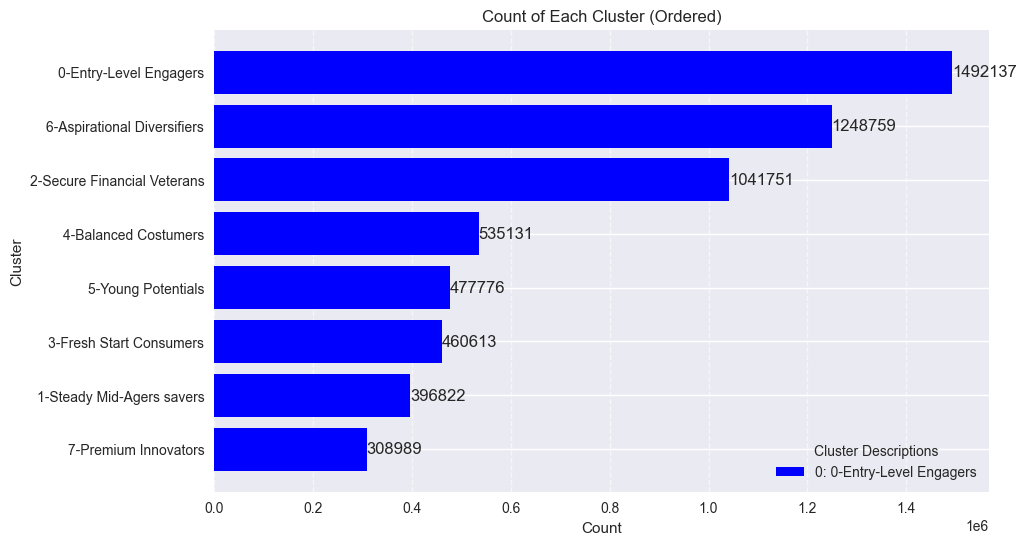

In [23]:
# Assuming 'cluster' is the column containing cluster values in your DataFrame 'merged_all_three'
cluster_counts = merged_all_three['cluster'].value_counts()

# Sorting the cluster counts in descending order
cluster_counts_sorted = cluster_counts.sort_values(ascending=False)

# Dictionary mapping cluster numbers to descriptions
cluster_descriptions = {
    0: '0-Entry-Level Engagers',
    1: '1-Steady Mid-Agers savers',
    2: '2-Secure Financial Veterans',
    3: '3-Fresh Start Consumers',
    4: '4-Balanced Customers',
    5: '5-Young Potentials',
    6: '6-Aspirational Diversifiers',
    7: '7-Premium Innovators'
}

# Plotting the bar chart
plt.figure(figsize=(10, 6))
bars = plt.barh(range(len(cluster_counts_sorted)), cluster_counts_sorted.values, color='blue')
plt.xlabel('Count')
plt.ylabel('Cluster')
plt.title('Count of Each Cluster (Ordered)')
plt.yticks(range(len(cluster_counts_sorted)), [cluster_descriptions[idx] for idx in cluster_counts_sorted.index])

# Adding labels on top of the bars
for bar, count in zip(bars, cluster_counts_sorted.values):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, count, 
             va='center', ha='left', fontsize=12)

plt.gca().invert_yaxis()  # Invert y-axis to display the highest count at the top
plt.grid(axis='x', linestyle='--', alpha=0.6)

# Creating the legend
legend_labels = [f"{key}: {value}" for key, value in cluster_descriptions.items()]
plt.legend(legend_labels, loc='lower right', title='Cluster Descriptions', title_fontsize='medium')

plt.show()


In [24]:
cluster_counts = merged_all_three['cluster'].value_counts()
cluster_counts

cluster
0    1492137
6    1248759
2    1041751
4     535131
5     477776
3     460613
1     396822
7     308989
Name: count, dtype: int64

We can observe that clusters 0, 6, and 2 represent the majority of customers, while clusters 7, 1, and 3 represent a smaller portion of the population. The difference in customer distribution between the top three clusters and the bottom three clusters is substantial. 

Additionally, there is a significant difference between the top three clusters and the fourth cluster compared to the bottom three clusters.
Based on this observation, we can infer that there are distinct segments within our customer base, with clusters 0, 6, and 2 likely representing the most common customer profiles or behaviors. Understanding the characteristics and needs of these dominant clusters can help us tailor our marketing strategies and product offerings to better serve the majority of our customers. Additionally, identifying the smaller clusters (7, 1, and 3) and understanding their unique attributes can help us develop targeted approaches to engage and retain these customer segments, potentially increasing overall customer satisfaction and loyalty.

In [25]:
# Set display options to show all columns and rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
display(merged_all_three.head(5))
display(monthly_aggregated.head(5))
display

,pk_partition,pk_cid,loans,mortgage,funds,securities,long_term_deposit,credit_card,payroll,payroll_pension_unknown,payroll_account,emc_account,debit_card,em_account_p,em_account,entry_date,active_customer,segment,region_code,deceased,New Monthly Subscribers,prev_partition,Loyal Customer,New Customer,Regular Customer,Entry_Channel_KAT,Entry_Channel_KFC,Entry_Channel_KHE,Entry_Channel_KHK,Entry_Channel_KHQ,Entry_Channel_Others,Entry_Channel_Unknown,01 - TOP,02 - PARTICULARES,03 - UNIVERSITARIO,Unknown Segment,region_10,region_11,region_12,region_13,region_14,region_15,region_18,region_2,region_21,region_28,region_29,region_3,region_30,region_33,region_35,region_36,region_37,region_39,region_41,region_45,region_46,region_47,region_50,region_6,region_7,region_8,region_Others,female,age_group_Adult,age_group_Middle-Aged,age_group_Senior,age_group_Young Adult,Unknown_salary,high_salary,low_salary,medium_salary,short_term_deposit,pension,savings_products,loan_products,investment_products,payment_products,cluster
0,2018-01-28,1000028,False,False,False,False,False,False,False,False,False,False,True,False,True,2017-01-03,True,02 - PARTICULARES,region_28,0,0,2017-12-29,False,False,True,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,True,False,False,False,False,False,True,0
1,2018-02-28,1000028,False,False,False,False,False,False,False,False,False,False,True,False,True,2017-01-03,True,02 - PARTICULARES,region_28,0,0,2018-01-29,False,False,True,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,True,False,False,False,False,False,True,0
2,2018-03-28,1000028,False,False,False,False,False,False,False,False,False,False,True,False,True,2017-01-03,True,02 - PARTICULARES,region_28,0,0,2018-03-01,False,False,True,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,True,False,False,False,False,False,True,0
3,2018-04-28,1000028,False,False,False,False,False,False,False,False,False,False,True,False,True,2017-01-03,True,02 - PARTICULARES,region_28,0,0,2018-03-29,False,False,True,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,True,False,False,False,False,False,True,0
4,2018-05-28,1000028,False,False,False,False,False,False,False,False,False,False,True,False,True,2017-01-03,True,02 - PARTICULARES,region_28,0,0,2018-04-29,False,False,True,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,True,False,False,False,False,False,True,0


,pk_partition,deceased,Total_Subscribers,Active_Customers,New Monthly Subscribers,Unsubscribed,Loyal Customer,New Customer,Regular Customer,Entry_Channel_KAT,Entry_Channel_KFC,Entry_Channel_KHE,Entry_Channel_KHK,Entry_Channel_KHQ,Entry_Channel_Others,Entry_Channel_Unknown,02 - PARTICULARES,03 - UNIVERSITARIO,Unknown Segment,01 - TOP,region_11,region_15,region_28,region_30,region_41,region_46,region_8,region_Others,female,age_group_Senior,age_group_Middle-Aged,age_group_Adult,age_group_Young Adult,medium_salary,Unknown_salary,high_salary,low_salary,Total_Short_Term_Deposit,loans,mortgages,funds,securities,credit_card,debit_card,long_term_deposit,payroll,pension,payroll_pension_unknown,payroll_account,em_account,em_account_p,emc_account
0,2018-01-28,47,239446,108211,2590,0,84767,0,154726,20926,40170,160717,5236,0,12426,18,65722,169792,28,3951,7224,11532,39396,13182,12957,13970,22128,31157,125478,5109,22411,106996,104977,192218,43494,2335,1446,883,19,15,786,932,3325,24696,4884,8145,8835,17,13478,215293,2,15320
1,2018-02-28,0,242474,111048,2720,47,84708,0,157766,20989,40126,160686,7263,0,13395,15,68176,170061,26,4211,7292,11577,40356,13275,13090,14136,22358,31548,126768,5253,23189,108841,105191,194633,44031,2354,1456,1343,19,15,871,962,3278,25438,4946,8888,9492,14,14236,217066,2,15813
2,2018-03-28,0,245211,113769,2143,0,84658,0,160553,21052,40114,160563,8865,1,14601,15,70412,170258,23,4518,7373,11604,41264,13334,13208,14273,22603,31889,127921,5428,23969,110455,105359,196869,44473,2389,1480,1664,23,17,968,962,3510,27036,4957,9733,9879,10,14979,218652,2,16412
3,2018-04-28,0,247417,116281,2090,0,84577,0,162840,21050,40095,160447,10221,1,15591,12,72208,170393,9,4807,7420,11648,42060,13377,13315,14393,22744,32171,128877,5584,24585,111760,105488,198657,44857,2413,1490,1740,24,17,1083,980,3724,27754,5099,9903,10555,10,15815,219787,2,16932
4,2018-05-28,1,249879,119029,2214,0,84554,0,165326,21093,40103,160330,11203,1,17139,11,74202,170548,8,5122,7476,11685,42908,13448,13414,14547,22928,32493,129912,5767,25252,113222,105639,200693,45247,2436,1504,1455,27,18,1144,1009,3797,27901,5348,9993,10145,10,16689,221261,2,17553


<function IPython.core.display_functions.display(*objs, include=None, exclude=None, metadata=None, transient=None, display_id=None, raw=False, clear=False, **kwargs)>

Let's calculate the product popularity matrix, considering both the popularity for the customer and the ROI (popularity for the business), and their most representative clusters. We will incorporate a decay weight in counting the product subscriptions, where the eldest subscriptions receive a weight of 0.02 and the most recent ones receive a weight of 1. This approach will help us capture the evolving trends in product popularity over time within each cluster.

In [26]:
# Partition dates
monthly_aggregated['pk_partition'] = pd.to_datetime(monthly_aggregated['pk_partition']) 

# Set current date to last partition date 
current_date = datetime(2019, 5, 28)  

In [27]:
# Calculate number of months elapsed
monthly_aggregated['months_elapsed'] = (current_date.year - monthly_aggregated['pk_partition'].dt.year) * 12 + (current_date.month - monthly_aggregated['pk_partition'].dt.month)

In [28]:
# Update decay weights for 16 months:decay for the old interactions accounted less than the recent ones
decay = [0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.16, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
# Apply decay weight 
monthly_aggregated['weight'] = decay

In [29]:
monthly_aggregated

,pk_partition,deceased,Total_Subscribers,Active_Customers,New Monthly Subscribers,Unsubscribed,Loyal Customer,New Customer,Regular Customer,Entry_Channel_KAT,Entry_Channel_KFC,Entry_Channel_KHE,Entry_Channel_KHK,Entry_Channel_KHQ,Entry_Channel_Others,Entry_Channel_Unknown,02 - PARTICULARES,03 - UNIVERSITARIO,Unknown Segment,01 - TOP,region_11,region_15,region_28,region_30,region_41,region_46,region_8,region_Others,female,age_group_Senior,age_group_Middle-Aged,age_group_Adult,age_group_Young Adult,medium_salary,Unknown_salary,high_salary,low_salary,Total_Short_Term_Deposit,loans,mortgages,funds,securities,credit_card,debit_card,long_term_deposit,payroll,pension,payroll_pension_unknown,payroll_account,em_account,em_account_p,emc_account,months_elapsed,weight
0,2018-01-28,47,239446,108211,2590,0,84767,0,154726,20926,40170,160717,5236,0,12426,18,65722,169792,28,3951,7224,11532,39396,13182,12957,13970,22128,31157,125478,5109,22411,106996,104977,192218,43494,2335,1446,883,19,15,786,932,3325,24696,4884,8145,8835,17,13478,215293,2,15320,16,0.02
1,2018-02-28,0,242474,111048,2720,47,84708,0,157766,20989,40126,160686,7263,0,13395,15,68176,170061,26,4211,7292,11577,40356,13275,13090,14136,22358,31548,126768,5253,23189,108841,105191,194633,44031,2354,1456,1343,19,15,871,962,3278,25438,4946,8888,9492,14,14236,217066,2,15813,15,0.04
2,2018-03-28,0,245211,113769,2143,0,84658,0,160553,21052,40114,160563,8865,1,14601,15,70412,170258,23,4518,7373,11604,41264,13334,13208,14273,22603,31889,127921,5428,23969,110455,105359,196869,44473,2389,1480,1664,23,17,968,962,3510,27036,4957,9733,9879,10,14979,218652,2,16412,14,0.06
3,2018-04-28,0,247417,116281,2090,0,84577,0,162840,21050,40095,160447,10221,1,15591,12,72208,170393,9,4807,7420,11648,42060,13377,13315,14393,22744,32171,128877,5584,24585,111760,105488,198657,44857,2413,1490,1740,24,17,1083,980,3724,27754,5099,9903,10555,10,15815,219787,2,16932,13,0.08
4,2018-05-28,1,249879,119029,2214,0,84554,0,165326,21093,40103,160330,11203,1,17139,11,74202,170548,8,5122,7476,11685,42908,13448,13414,14547,22928,32493,129912,5767,25252,113222,105639,200693,45247,2436,1504,1455,27,18,1144,1009,3797,27901,5348,9993,10145,10,16689,221261,2,17553,12,0.10
5,2018-06-28,0,252059,121524,1925,1,84514,1872,165673,21092,40086,160223,11281,1,19368,8,76078,170667,0,5314,7517,11707,43712,13494,13501,14672,23115,32719,130839,5937,25830,114487,105805,202505,45575,2463,1516,1244,27,19,1158,1016,4002,28821,5580,10945,11632,0,15534,224297,2,17933,11,0.12
6,2018-07-28,7,339284,129250,14091,0,103583,19950,215758,26307,59202,196631,16072,1,24298,16780,108142,208932,16850,5367,9097,14169,68897,16178,16535,19002,37379,44486,174518,8335,35831,148208,146917,271860,61660,3784,1987,1282,28,20,1171,1050,4137,29569,5788,11888,12777,0,16913,234294,2,18171,10,0.14
7,2018-08-28,5,352865,136319,16973,961,103462,34067,215341,26272,59155,196377,15991,12844,27783,14448,112628,220172,14507,5563,9311,15008,70128,16725,16726,21147,39189,46614,181880,8633,36989,152763,154485,283118,63753,3896,2103,1335,29,20,1218,1130,4206,29198,5916,11383,12124,0,18114,245955,2,18322,9,0.16
8,2018-09-28,10,375259,144753,21416,920,103382,56827,215060,26304,59117,196164,15941,23234,31273,23236,116506,229673,23338,5752,9764,16272,75331,17841,17668,23419,40194,49138,193878,8988,38429,159594,168258,293234,75869,4007,2159,1386,31,20,1236,1198,4289,31677,6149,11850,12622,0,18856,261185,2,18606,8,0.20
9,2018-10-28,6,402232,151922,28462,1224,103263,84317,214658,26323,59091,195827,15915,41312,35630,28140,120663,247333,28183,6059,10409,16933,83671,19171,18964,24744,41649,52036,208876,9478,39878,168318,184564,292903,103176,4002,2157,1374,33,19,1248,1345,4385,34363,6369,12453,13220,0,19935,277680,2,18828,7,0.30


In [30]:

# Let's also add cluster counts
cluster_counts = merged_all_three.groupby(['pk_partition', 'cluster'])['pk_cid'].count().unstack(fill_value=0)

# Convert the index of cluster_counts to datetime64[ns] if it's not already
cluster_counts.index = pd.to_datetime(cluster_counts.index)

# Assuming 'cluster_counts' is the DataFrame containing the cluster counts
cluster_counts.columns = ['cluster_' + str(col) for col in cluster_counts.columns]

# Add the cluster counts to the monthly_aggregated DataFrame
monthly_aggregated = monthly_aggregated.join(cluster_counts, on='pk_partition')

I want to see the story behind differnet clusters. How their behaviour changed over time:

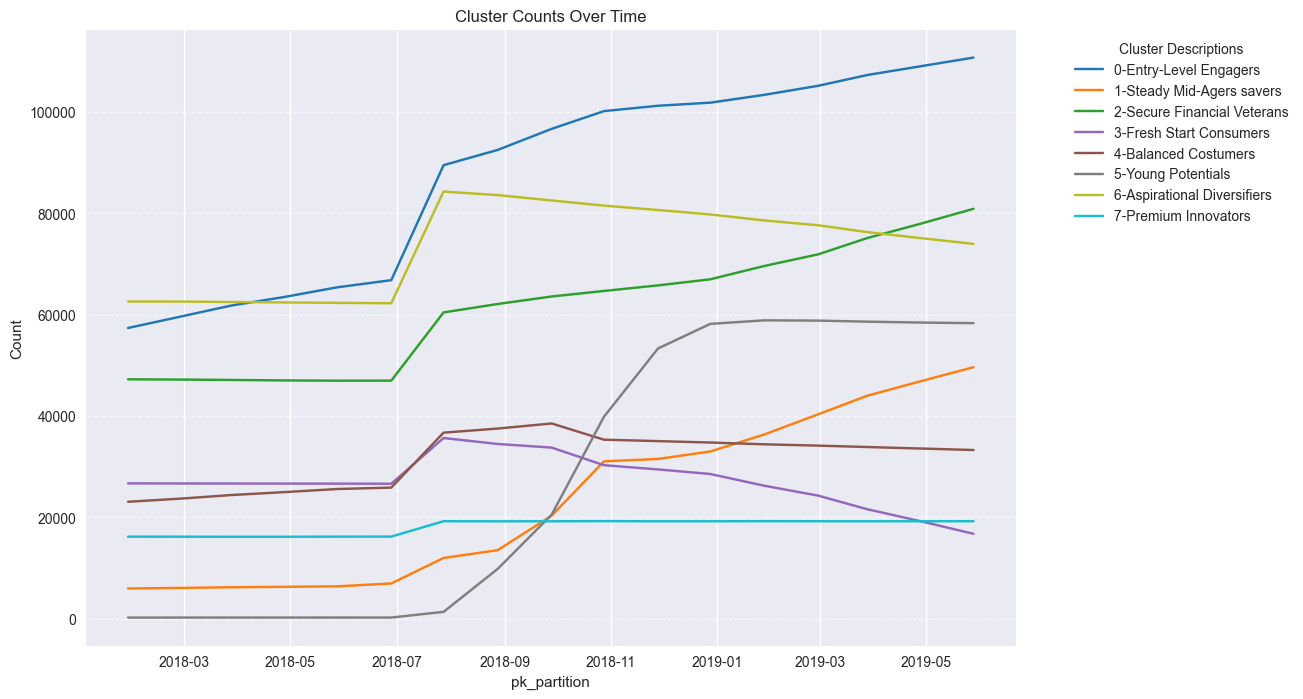

In [31]:

# Convert column names to strings and filter 'cluster_' columns
cluster_columns = [str(col) for col in monthly_aggregated.columns if str(col).startswith('cluster_')]

# Define a color palette
colors = plt.cm.get_cmap('tab10', len(cluster_columns))

# Dictionary mapping cluster numbers to descriptions
cluster_descriptions = {
    'cluster_0': '0-Entry-Level Engagers',
    'cluster_1': '1-Steady Mid-Agers savers',
    'cluster_2': '2-Secure Financial Veterans',
    'cluster_3': '3-Fresh Start Consumers',
    'cluster_4': '4-Balanced Customers',
    'cluster_5': '5-Young Potentials',
    'cluster_6': '6-Aspirational Diversifiers',
    'cluster_7': '7-Premium Innovators'
}

# Plotting the line chart
plt.figure(figsize=(12, 8))
for i, cluster_column in enumerate(cluster_columns):
    plt.plot(monthly_aggregated['pk_partition'], monthly_aggregated[cluster_column], label=cluster_descriptions[cluster_column], color=colors(i))

plt.xlabel('pk_partition')
plt.ylabel('Count')
plt.title('Cluster Counts Over Time')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.legend(title='Cluster Descriptions', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


We can observe that Young Potential group (Cluster 5) and Entry-level Engagers(Cluster 0) have experienced the longest periods of growth.However, Young Potential group has plateaued since 2018-12-28. Aspirational Diversifiers (Cluster 6), the second-largest cluster, has shown a consistent decrease, now falling below the population of Secure Financial Veterans (Cluster 2) for this month. Premium Innovators (Cluster 7) appears to be stagnating, with no new customers added after an initial increase in July 2018, likely due to marketing efforts which applies to all of the service. The decline in Aspiratianal Diversifiers (Cluster 6) and Fresh Start Consumers (Cluster 3) suggests customer unsubscriptions, which may require a specific campaign tailored to retention, different from the current focus of our campaign.

In [32]:
products =monthly_aggregated[['pk_partition','Total_Short_Term_Deposit', 'loans', 'mortgages', 'funds', 'securities', 'credit_card', 'debit_card', 'long_term_deposit',	'payroll', 'pension', 'payroll_pension_unknown', 'payroll_account',	'em_account', 'em_account_p', 'emc_account', 'months_elapsed', 'weight']]

In [33]:
products

,pk_partition,Total_Short_Term_Deposit,loans,mortgages,funds,securities,credit_card,debit_card,long_term_deposit,payroll,pension,payroll_pension_unknown,payroll_account,em_account,em_account_p,emc_account,months_elapsed,weight
0,2018-01-28,883,19,15,786,932,3325,24696,4884,8145,8835,17,13478,215293,2,15320,16,0.02
1,2018-02-28,1343,19,15,871,962,3278,25438,4946,8888,9492,14,14236,217066,2,15813,15,0.04
2,2018-03-28,1664,23,17,968,962,3510,27036,4957,9733,9879,10,14979,218652,2,16412,14,0.06
3,2018-04-28,1740,24,17,1083,980,3724,27754,5099,9903,10555,10,15815,219787,2,16932,13,0.08
4,2018-05-28,1455,27,18,1144,1009,3797,27901,5348,9993,10145,10,16689,221261,2,17553,12,0.10
5,2018-06-28,1244,27,19,1158,1016,4002,28821,5580,10945,11632,0,15534,224297,2,17933,11,0.12
6,2018-07-28,1282,28,20,1171,1050,4137,29569,5788,11888,12777,0,16913,234294,2,18171,10,0.14
7,2018-08-28,1335,29,20,1218,1130,4206,29198,5916,11383,12124,0,18114,245955,2,18322,9,0.16
8,2018-09-28,1386,31,20,1236,1198,4289,31677,6149,11850,12622,0,18856,261185,2,18606,8,0.20
9,2018-10-28,1374,33,19,1248,1345,4385,34363,6369,12453,13220,0,19935,277680,2,18828,7,0.30


In [34]:
products.columns

Index(['pk_partition', 'Total_Short_Term_Deposit', 'loans', 'mortgages',
       'funds', 'securities', 'credit_card', 'debit_card', 'long_term_deposit',
       'payroll', 'pension', 'payroll_pension_unknown', 'payroll_account',
       'em_account', 'em_account_p', 'emc_account', 'months_elapsed',
       'weight'],
      dtype='object')

In [35]:
# Weighted popularity 
products['loans_weighted'] = products['loans'] * products['weight']
products['Total_Short_Term_Deposit_weighted'] = products['Total_Short_Term_Deposit'] * products['weight']
products['mortgages_weighted'] = products['mortgages'] * products['weight']
products['funds_weighted'] = products['funds'] * products['weight']
products['securities_weighted'] = products['securities'] * products['weight']
products['credit_card_weighted'] = products['credit_card'] * products['weight']
products['debit_card_weighted'] = products['debit_card'] * products['weight']
products['long_term_deposit_weighted'] = products['long_term_deposit'] * products['weight']
products['payroll_weighted'] = products['payroll'] * products['weight']
products['pension_weighted'] = products['pension'] * products['weight']
products['payroll_pension_unknown_weighted'] = products['payroll_pension_unknown'] * products['weight']
products['payroll_account_weighted'] = products['payroll_account'] * products['weight']
products['em_account_weighted'] = products['em_account'] * products['weight']
products['em_account_p_weighted'] = products['em_account_p'] * products['weight']
products['emc_account_weighted'] = products['emc_account'] * products['weight']

# Overall weighted popularity  
loans_popularity = products['loans_weighted'].sum()/products['weight'].sum()
Short_Term_Deposit_popularity = products['Total_Short_Term_Deposit_weighted'].sum()/products['weight'].sum()
mortgages_popularity = products['mortgages_weighted'].sum()/products['weight'].sum()
funds_popularity = products['funds_weighted'].sum()/products['weight'].sum()
securities_popularity = products['securities_weighted'].sum()/products['weight'].sum()
credit_card_popularity = products['credit_card_weighted'].sum()/products['weight'].sum()
debit_card_popularity = products['debit_card_weighted'].sum()/products['weight'].sum()
long_term_deposit_popularity = products['long_term_deposit_weighted'].sum()/products['weight'].sum()
payroll_popularity = products['payroll_weighted'].sum()/products['weight'].sum()
pension_popularity = products['pension_weighted'].sum()/products['weight'].sum()
payroll_pension_unknown_popularity = products['payroll_pension_unknown_weighted'].sum()/products['weight'].sum()
payroll_account_popularity = products['payroll_account_weighted'].sum()/products['weight'].sum()
em_account_popularity = products['em_account_weighted'].sum()/products['weight'].sum()
em_account_p_popularity = products['em_account_p_weighted'].sum()/products['weight'].sum()
emc_account_popularity = products['emc_account_weighted'].sum()/products['weight'].sum()


# Creating popularity matrix
product_names = ['loans', 'Total_Short_Term_Deposit', 'mortgages', 'funds', 'securities', 'credit_card', 'debit_card', 'long_term_deposit', 'payroll', 'pension', 'payroll_pension_unknown', 'payroll_account', 'em_account', 'em_account_p', 'emc_account']
popularity_values = [loans_popularity, Short_Term_Deposit_popularity, mortgages_popularity, funds_popularity, securities_popularity, credit_card_popularity, debit_card_popularity, long_term_deposit_popularity, payroll_popularity, pension_popularity, payroll_pension_unknown_popularity, payroll_account_popularity, em_account_popularity, em_account_p_popularity, emc_account_popularity]

# Create DataFrame
popularity= pd.DataFrame({
    'Product': product_names,
    'Popularity': popularity_values
})

# Print the DataFrame
print(popularity)



                     Product     Popularity
0                      loans      29.434641
1   Total_Short_Term_Deposit     399.833333
2                  mortgages      20.565359
3                      funds    1287.526144
4                 securities    1577.133987
5                credit_card    4521.718954
6                 debit_card   38267.513072
7          long_term_deposit    6332.424837
8                    payroll   13997.866013
9                    pension   14828.362745
10   payroll_pension_unknown       0.539216
11           payroll_account   22785.290850
12                em_account  283907.006536
13              em_account_p       2.000000
14               emc_account   21474.349673


In [36]:
popularity

,Product,Popularity
0,loans,29.434641
1,Total_Short_Term_Deposit,399.833333
2,mortgages,20.565359
3,funds,1287.526144
4,securities,1577.133987
5,credit_card,4521.718954
6,debit_card,38267.513072
7,long_term_deposit,6332.424837
8,payroll,13997.866013
9,pension,14828.362745


In [37]:
# Normalize popularity between 0-1
popularity['Normalized_Popularity'] = (popularity['Popularity'] - popularity['Popularity'].min()) / (popularity['Popularity'].max() - popularity['Popularity'].min())

In [38]:
popularity

,Product,Popularity,Normalized_Popularity
0,loans,29.434641,0.000102
1,Total_Short_Term_Deposit,399.833333,0.001406
2,mortgages,20.565359,0.000071
3,funds,1287.526144,0.004533
4,securities,1577.133987,0.005553
5,credit_card,4521.718954,0.015925
6,debit_card,38267.513072,0.134787
7,long_term_deposit,6332.424837,0.022303
8,payroll,13997.866013,0.049303
9,pension,14828.362745,0.052228


In [39]:
# Apply ROI values to consider both company and user benefit
roi = {
  'loans': 60,
  'credit_card': 60,
  'debit_card': 60,
  
  'mortgages': 40,
  'funds': 40,
  'securities': 40,
  'payroll': 40,
  'pension': 40,
  'payroll_pension_unknown': 0,
  
  'Total_Short_Term_Deposit': 40,
  'long_term_deposit': 40,  

  'payroll_account': 10,
  'em_account': 10,
  'em_account_p': 10,
  'emc_account': 10
}

# Apply ROI weighting to unnormalized popularity
popularity['Weighted_ROI'] = popularity['Popularity'] * popularity['Product'].map(roi)


In [40]:
popularity

,Product,Popularity,Normalized_Popularity,Weighted_ROI
0,loans,29.434641,0.000102,1.766078e+03
1,Total_Short_Term_Deposit,399.833333,0.001406,1.599333e+04
2,mortgages,20.565359,0.000071,8.226144e+02
3,funds,1287.526144,0.004533,5.150105e+04
4,securities,1577.133987,0.005553,6.308536e+04
5,credit_card,4521.718954,0.015925,2.713031e+05
6,debit_card,38267.513072,0.134787,2.296051e+06
7,long_term_deposit,6332.424837,0.022303,2.532970e+05
8,payroll,13997.866013,0.049303,5.599146e+05
9,pension,14828.362745,0.052228,5.931345e+05


In [41]:
# Normalize weighted ROI
popularity['Normalized_Weighted_ROI'] = (popularity['Weighted_ROI'] - popularity['Weighted_ROI'].min()) / (popularity['Weighted_ROI'].max() - popularity['Weighted_ROI'].min())


In [42]:
popularity

,Product,Popularity,Normalized_Popularity,Weighted_ROI,Normalized_Weighted_ROI
0,loans,29.434641,0.000102,1.766078e+03,0.000622
1,Total_Short_Term_Deposit,399.833333,0.001406,1.599333e+04,0.005633
2,mortgages,20.565359,0.000071,8.226144e+02,0.000290
3,funds,1287.526144,0.004533,5.150105e+04,0.018140
4,securities,1577.133987,0.005553,6.308536e+04,0.022220
5,credit_card,4521.718954,0.015925,2.713031e+05,0.095561
6,debit_card,38267.513072,0.134787,2.296051e+06,0.808733
7,long_term_deposit,6332.424837,0.022303,2.532970e+05,0.089218
8,payroll,13997.866013,0.049303,5.599146e+05,0.197218
9,pension,14828.362745,0.052228,5.931345e+05,0.208919


In [43]:
# Add ranking column
popularity['Rank'] = popularity['Normalized_Weighted_ROI'].rank(ascending=False)

# Sort by rank
popularity = popularity.sort_values('Rank')
popularity['Rank'].astype(int)
# Sort the DataFrame by 'Popularity' column
popularity = popularity.sort_values(by='Rank', ascending=True)
# Reset the index based on rank
popularity= popularity.reset_index(drop=True)
display(popularity)

,Product,Popularity,Normalized_Popularity,Weighted_ROI,Normalized_Weighted_ROI,Rank
0,em_account,283907.006536,1.000000,2.839070e+06,1.000000,1.0
1,debit_card,38267.513072,0.134787,2.296051e+06,0.808733,2.0
2,pension,14828.362745,0.052228,5.931345e+05,0.208919,3.0
3,payroll,13997.866013,0.049303,5.599146e+05,0.197218,4.0
4,credit_card,4521.718954,0.015925,2.713031e+05,0.095561,5.0
5,long_term_deposit,6332.424837,0.022303,2.532970e+05,0.089218,6.0
6,payroll_account,22785.290850,0.080254,2.278529e+05,0.080256,7.0
7,emc_account,21474.349673,0.075637,2.147435e+05,0.075639,8.0
8,securities,1577.133987,0.005553,6.308536e+04,0.022220,9.0
9,funds,1287.526144,0.004533,5.150105e+04,0.018140,10.0


Now, let's create a user-item interaction matrix and find similar neighbors. For recommendations, I intend to merge product popularity with user similarity to offer the most suitable recommendations. Although the boss requested a user-item interaction matrix as the foundation for the recommender, I propose incorporating product popularity to ensure the selected products are also beneficial to the company. This will guide the selection of the 10,000 customers targeted for the marketing campaign

In [44]:
popularity['Product']

0                   em_account
1                   debit_card
2                      pension
3                      payroll
4                  credit_card
5            long_term_deposit
6              payroll_account
7                  emc_account
8                   securities
9                        funds
10    Total_Short_Term_Deposit
11                       loans
12                   mortgages
13                em_account_p
14     payroll_pension_unknown
Name: Product, dtype: object

In [45]:
merged_all_three.columns

Index(['pk_partition', 'pk_cid', 'loans', 'mortgage', 'funds', 'securities',
       'long_term_deposit', 'credit_card', 'payroll',
       'payroll_pension_unknown', 'payroll_account', 'emc_account',
       'debit_card', 'em_account_p', 'em_account', 'entry_date',
       'active_customer', 'segment', 'region_code', 'deceased',
       'New Monthly Subscribers', 'prev_partition', 'Loyal Customer',
       'New Customer', 'Regular Customer', 'Entry_Channel_KAT',
       'Entry_Channel_KFC', 'Entry_Channel_KHE', 'Entry_Channel_KHK',
       'Entry_Channel_KHQ', 'Entry_Channel_Others', 'Entry_Channel_Unknown',
       '01 - TOP', '02 - PARTICULARES', '03 - UNIVERSITARIO',
       'Unknown Segment', 'region_10', 'region_11', 'region_12', 'region_13',
       'region_14', 'region_15', 'region_18', 'region_2', 'region_21',
       'region_28', 'region_29', 'region_3', 'region_30', 'region_33',
       'region_35', 'region_36', 'region_37', 'region_39', 'region_41',
       'region_45', 'region_46', 'reg

In [46]:
columns_to_drop = [
    'active_customer', 'segment', 'region_code',
    'New Monthly Subscribers', 'prev_partition', 'Loyal Customer',
    'New Customer', 'Regular Customer', 'Entry_Channel_KAT',
    'Entry_Channel_KFC', 'Entry_Channel_KHE', 'Entry_Channel_KHK',
    'Entry_Channel_KHQ', 'Entry_Channel_Others', 'Entry_Channel_Unknown',
    '01 - TOP', '02 - PARTICULARES', '03 - UNIVERSITARIO',
    'Unknown Segment', 'region_10', 'region_11', 'region_12', 'region_13',
    'region_14', 'region_15', 'region_18', 'region_2', 'region_21',
    'region_28', 'region_29', 'region_3', 'region_30', 'region_33',
    'region_35', 'region_36', 'region_37', 'region_39', 'region_41',
    'region_45', 'region_46', 'region_47', 'region_50', 'region_6',
    'region_7', 'region_8', 'region_Others', 'female', 'age_group_Adult',
    'age_group_Middle-Aged', 'age_group_Senior', 'age_group_Young Adult',
    'Unknown_salary', 'high_salary', 'low_salary', 'medium_salary'
]

merged_all_three.drop(columns=columns_to_drop, inplace=True)


In [47]:
# Convert 'pk_partition' to date format
merged_all_three['pk_partition'] = pd.to_datetime(merged_all_three['pk_partition'])
# Calculate number of months elapsed
merged_all_three['months_elapsed'] = (current_date.year - merged_all_three['pk_partition'].dt.year) * 12 + (current_date.month - merged_all_three['pk_partition'].dt.month)

In [48]:
# Define the range of weights and corresponding months elapsed
weights = [1, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.16, 0.14, 0.12, 0.1, 0.08, 0.06, 0.04, 0.02]
months_elapsed_range = range(0, len(weights))
# Map months elapsed to corresponding weight
merged_all_three['weight'] = merged_all_three['months_elapsed'].map(dict(zip(months_elapsed_range, weights)))

In [49]:
merged_all_three[['pk_partition','months_elapsed','weight']].head(60)

,pk_partition,months_elapsed,weight
0,2018-01-28,16,0.02
1,2018-02-28,15,0.04
2,2018-03-28,14,0.06
3,2018-04-28,13,0.08
4,2018-05-28,12,0.10
5,2018-06-28,11,0.12
6,2018-07-28,10,0.14
7,2018-08-28,9,0.16
8,2018-09-28,8,0.20
9,2018-10-28,7,0.30


In [50]:
merged_all_three.shape

(5961978, 26)

In [51]:
# Create a user product interaction matrix considering time decaz factor
interaction_matrix_columns=['em_account','debit_card','pension','payroll','credit_card','long_term_deposit','payroll_account','emc_account','securities','funds','short_term_deposit','loans','mortgage','payroll_pension_unknown','em_account_p']
# Create an empty DataFrame
weighted_values = pd.DataFrame()
weighted_values = pd.DataFrame(merged_all_three[['pk_cid','pk_partition']])



In [52]:
weighted_values.head()

,pk_cid,pk_partition
0,1000028,2018-01-28
1,1000028,2018-02-28
2,1000028,2018-03-28
3,1000028,2018-04-28
4,1000028,2018-05-28


In [53]:
# Multiply each column by the corresponding weight
for column in interaction_matrix_columns:
    weighted_values[column] = merged_all_three[column] * merged_all_three['weight']

In [54]:
weighted_values.head()

,pk_cid,pk_partition,em_account,debit_card,pension,payroll,credit_card,long_term_deposit,payroll_account,emc_account,securities,funds,short_term_deposit,loans,mortgage,payroll_pension_unknown,em_account_p
0,1000028,2018-01-28,0.02,0.02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1000028,2018-02-28,0.04,0.04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1000028,2018-03-28,0.06,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1000028,2018-04-28,0.08,0.08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1000028,2018-05-28,0.10,0.10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [55]:
weighted_values.shape

(5961978, 17)

In [56]:
# Group by 'pk_cid' and sum the values for each column
weighted_values.drop(columns=['pk_partition'], inplace=True)

# Convert all columns to float32 because of memory issues
weighted_values = weighted_values.astype(np.float32)

weighted_values = weighted_values.groupby('pk_cid').sum()


In [57]:
weighted_values.head(100)

,em_account,debit_card,pension,payroll,credit_card,long_term_deposit,payroll_account,emc_account,securities,funds,short_term_deposit,loans,mortgage,payroll_pension_unknown,em_account_p
pk_cid,,,,,,,,,,,,,,,
15891.0,0.14,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0
16063.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0
16203.0,4.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0
16502.0,5.20,0.00,0.00,0.00,0.00,0.00,0.00,4.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0
17457.0,6.12,3.00,0.00,0.00,0.00,5.82,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0
17590.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0
17799.0,6.12,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0
17970.0,0.00,6.12,6.12,0.14,0.00,0.00,6.12,6.12,3.40,0.00,0.00,0.0,0.0,0.0,0.0
17980.0,0.00,0.00,0.00,0.00,0.00,5.92,0.00,0.00,0.00,5.92,0.00,0.0,0.0,0.0,0.0


In [58]:
interactions=weighted_values

In [59]:
merged_all_three.columns

Index(['pk_partition', 'pk_cid', 'loans', 'mortgage', 'funds', 'securities',
       'long_term_deposit', 'credit_card', 'payroll',
       'payroll_pension_unknown', 'payroll_account', 'emc_account',
       'debit_card', 'em_account_p', 'em_account', 'entry_date', 'deceased',
       'short_term_deposit', 'pension', 'savings_products', 'loan_products',
       'investment_products', 'payment_products', 'cluster', 'months_elapsed',
       'weight'],
      dtype='object')

In [60]:
interactions.columns

Index(['em_account', 'debit_card', 'pension', 'payroll', 'credit_card',
       'long_term_deposit', 'payroll_account', 'emc_account', 'securities',
       'funds', 'short_term_deposit', 'loans', 'mortgage',
       'payroll_pension_unknown', 'em_account_p'],
      dtype='object')

As the file becomes so big, I am going to save the required dataframes and move to the next notebook.

In [ ]:
merged_all_three.to_csv('merged_all_three_product.csv')
interactions.to_csv('interactions.csv')
popularity.to_csv('popularity.csv')
monthly_aggregated.to_csv('monthly_aggregated.csv')
cluster_check.to_csv('cluster_check.csv')
cluster_counts.to_csv('cluster_counts.csv')

------------------------------------------------------------------------------------------------------------------------